# Introduction to orbital mechanics: conic sections

Orbital mechanics refers to the study of motion due to the gravitational influence of one mass over another.
To start, we'll focus on unperturbed orbits mostly of satellites around Earth, meaning orbits that result 
only from the force of gravity from a larger body, and without the influence of
- thrust forces
- gravitational perturbations
- irregularities in the Earth's radius

To determine what orbits are possible, we need to derive the orbital equation of motion.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# these lines are only for helping improve the display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 150
plt.rcParams['savefig.dpi'] = 150

## Orbital equation of motion

For now, we will focus on orbital problems involving two bodies (i.e., the two-body problem), with two
different masses, usually where one is much larger than the other, such as a satellite orbiting the Earth.

We will also focus on orbital motion in the two-dimensional **perifocal frame**, where all motion remains
in the same two-dimensional plane with the two masses.

$\vec{R_1}$ and $\vec{R_2}$ are the position vectors for masses $M_1$ and $M_2$, respectively, from some absolute
frame of reference, and then we can define the relative position vector from $M_1$ to $M_2$ as $\vec{r} = \vec{R_2} - \vec{R_1}$.

These masses act on each other via the force of gravity—this is reciprocal, in that each mass acts on the other.
Newton's gravitational law states that this force is

$$
F_{12} = G \frac{m_1 m_2}{r^2} = -F_{21} \;,
$$ (newton)

where $r^2 = | \vec{r} |$ and $G = 6.674 \cdot 10^{-11}$ m<sup>3</sup>/(kg s<sup>2</sup>), the universal gravitational constant.

If we take the time derivative of $\vec{r}$ twice, we get the acceleration vector, 
and can substitute $\vec{F} = m \vec{a}$ with Equation {eq}`newton`:

$$
\begin{align}
\vec{\ddot{r}} &= \vec{\ddot{R}}_2 - \vec{\ddot{R}}_1 \\
\vec{\ddot{r}} &= -G \left( \frac{m_1 m_2}{r^2} \right) \left( \frac{1}{m_1} + \frac{1}{m_2} \right) \vec{u}_r \;,
\end{align}
$$

where $\vec{u}_r = \frac{\vec{r}}{|\vec{r}|}$ is the unit direction vector.
Since the masses involved, and gravitational constant, do not change for a given
orbital system, we can simplify this by defining the **gravitational parameter** $\mu$:

$$
G (m_1 + m_2) \approx G m_1 \equiv \mu \;,
$$

where $m_1$ is the mass of the central body (e.g, Earth) and $m_2$ is the mass of the orbiting body,
and $m_2 \ll m_1$. For a given planetary orbit, this parameter does not change, and 
for an Earth-satellite system $\mu = 398,600 \, \text{km}^3/\text{s}^2$.

Then, we can express the **orbital equation of motion** as

$$
\vec{\ddot{r}} = -\frac{\mu}{r^3} \vec{r} \;,
$$ (orbital_equation)

where $r = |\vec{r}| = \sqrt{r_x^2 + r_y^2 + r_z^2}$ is the magnitude of the radial distance.
This is a vector, nonlinear, second-order ordinary differential equation.
We can solve this numerically by decomposing into a system of six first-order equations,
but we can also study orbits in a two-dimensional plane.

The goal of any solution approach is to obtain the **state vectors** of position and velocity,
$\vec{r}(t)$ and $\vec{v}(t)$, which are both functions of time.

## Specific angular momentum

Now that we know the equation governing orbital motion, and understand that this comes from Newton's law of gravitation,
we can see that in a general orbit, many quantities will constantly be changing: position, velocity, and force.
While these things are constantly changing, we will see that **specific angular momentum** remains constant:

$$
\vec{h} = \vec{r} \times \vec{v} \;,
$$

which is likely the single-most important quantity in orbital mechanics/astrodynamics.
Note $\vec{r}$ and $\vec{v}$ form an orbital plane, and
$\vec{h}$ is perpendicular to this plane.

We can show that specific angular momentum remains constant by taking the cross product of the 
orbital equation of motion with the position vector:

```{margin} Typo in book
There is a typo on page 14 of *Fundamentals of Astrodynamics* (2nd edition) in this derivation,
where $\frac{d}{dt} \left( \vec{r} \times \vec{\ddot{r}} \right)$ should be 
$\frac{d}{dt} \left( \vec{r} \times \vec{\dot{r}} \right)$.
```

$$
\begin{align}
\vec{r} \times \vec{\ddot{r}} + \vec{r} \times \frac{\mu}{r^3} \vec{r} &= 0 \quad \text{but } \vec{r} \times \vec{r} = 0 \\
\rightarrow \vec{r} \times \vec{\ddot{r}} &= 0 \;. \\
\text{Then, } \frac{d\vec{h}}{dt} = \frac{d}{dt} \left( \vec{r} \times \vec{v} \right) &= \frac{d}{dt} \left( \vec{r} \times \vec{\dot{r}} \right) \\
\text{Product rule: } \frac{d\vec{h}}{dt} = \vec{\dot{r}} \times \vec{\dot{r}} + \vec{r} \times \vec{\ddot{r}} &= \vec{r} \times \vec{\ddot{r}} \\
\therefore \frac{d\vec{h}}{dt} = \vec{r} \times \vec{\ddot{r}} &= 0 \;.
\end{align}
$$

Therefore, $\vec{h}$ is constant, while position, velocity, and force/acceleration may change.

## Orbit equation

If we know the specific angular momentum, it would be helpful to relate this to position and velocity for a specific orbit.
We can obtain a useful relation by taking the cross product of the orbital equation of motion with angular momentum:

$$
\begin{align}
\vec{\ddot{r}} \times \vec{h} + \frac{\mu}{r^3} \left(\vec{r} \times \vec{h}\right) &= 0 \\
\text{but } \frac{d}{dt} \left( \vec{\dot{r}} \times \vec{h} \right) &= \vec{\ddot{r}} \times \vec{h} + \vec{\dot{r}} \times \vec{\dot{h}} = \vec{\ddot{r}} \times \vec{h} \\
\rightarrow \frac{d}{dt} \left( \vec{\dot{r}} \times \vec{h} \right) + \frac{\mu}{r^3} \left[ \vec{r} \times \left( \vec{r} \times \vec{v} \right) \right] &= 0 \\
\text{via law of triple cross products: } \frac{d}{dt} \left( \vec{\dot{r}} \times \vec{h} \right) &= \frac{\mu}{r^3} \left[ \vec{\dot{r}} r^2 - \vec{r} \left(\vec{r} \cdot \vec{\dot{r}} \right) \right] \\
\int \frac{d}{dt} \left( \vec{\dot{r}} \times \vec{h} \right) &= \mu \int \frac{d}{dt} \left( \frac{\vec{r}}{|r|} \right) \\
\vec{\dot{r}} \times \vec{h} &= \frac{\mu}{r} \vec{r} + \vec{C} \;,
\end{align}
$$

where $\vec{C}$ is a vector constant of integration.
We can obtain a scalar equation by taking the dot product of the last result with the position vector:

$$
\begin{align}
\vec{r} \cdot \left( \vec{\dot{r}} \times \vec{h} \right) &= \mu \left( \vec{r} \cdot \frac{\vec{r}}{|r|} \right) + \vec{r} \cdot \vec{C} \\
\text{but } \vec{r} \cdot \vec{\dot{r}} \times \vec{h} = \vec{r} \cdot \vec{v} \times \vec{h} &= \vec{r} \times \vec{v} \cdot \vec{h} = \vec{h}\cdot\vec{h} = h^2 \\
\rightarrow h^2 &= \mu r + r \, C \cos \theta \\
\frac{h^2}{\mu} &= r \left( 1 + \frac{C}{\mu} \cos \theta \right) \\
\therefore r &= \frac{h^2 / \mu}{1 + e \cos \theta} \;,
\end{align}
$$

where $\theta$ is the angle between $\vec{r}$ and $\vec{C}$, called the **true anomaly** (and also referred to with the variable $\nu$ in some places),
and $e = \frac{C}{\mu}$ is the **eccentricity**.
The is the **orbit equation**, and it tells us the radial distance for a given location in orbit, based on a magnitude of angular momentum.

Now that we have an equation for the shape of any orbit, we can look at the different kinds of orbits that are possible.
The orbital equation above describes a family of curves called **conic sections**, because they can be formed by taking
two-dimensional slices of three-dimensional opposed cones:

:::{figure,myclass} fig-conic-sections
<img src="../images/conic-sections.*" alt="Conic sections" class="bg-white mb-1" width="400px">

Depiction of the conic sections: circle, ellipse, parabola, and hyperbola.
Source: Kelvinsong / [CC BY-SA](https://creativecommons.org/licenses/by-sa/3.0), hosted on [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:The_conical_cones_of_conics.svg).
:::

We can see that four orbital shapes are possible, depending on the value of eccentricity $e$:

* $e = 0$: circular orbit, which is a special case of an ellipse. GPS satellites have nearly circular orbits ($e < 0.02$), to keep nearly a constant radial distance from the surface.
* $0 < e < 1$: elliptical orbit. This is the shape of planetary orbits, and nearly all stable orbits are elliptical.
* $e = 1$: parabolic orbit. This is unnatural, and we generally won't discuss this type of orbit.
* $e > 1$: hyperbolic orbit. This is a so-called flyby orbit, where the satellite/orbiting object comes in close and then leaves.

## Velocity components

:::{figure,myclass} fig-flightpath
<img src="../images/FlightPathAngle.*" alt="Flight-path angle" class="bg-white mb-1" width="500px">

Position and velocity vectors of an object orbiting a central body,
showing the flight-path angle $\nu = \theta$.
Source: Åntøinæ / [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0), hosted on [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:FlightPathAngle.svg).
:::

The velocity vector can be broken into two components, in the radial and angular/transverse directions:

$$
\begin{align}
\vec{v} &= \vec{v}_r \hat{u}_r + \vec{v}_{\theta} \hat{u}_{\theta} \\
&= \dot{r} \hat{u}_r + r \dot{\theta} \hat{u}_{\theta} \\
v_r &= v_0 \sin \gamma \\
v_{\theta} &= v_0 \cos \gamma \;,
\end{align}
$$

where $\gamma$ is the flight-path angle (the angle between $\vec{r}$ and $\vec{v}$), 
$\hat{u}_r$ is the radial unit vector,
$\hat{u}_{\theta} = \hat{u}_{\perp}$ is the polar/transverse unit vector, and
$v_0 = |\vec{v}|$ is the velocity magnitude (which changes with time).

Ideally, we want to express the velocity components in terms of known quantities.
Let's expand the definition of angular momentum:

$$
\begin{align}
\vec{h} = \vec{r} \times \vec{v} &= \vec{r} \times \left(\dot{r} \hat{u}_r \right) + \vec{r} \times \left( r \dot{\theta} \hat{u}_{\theta} \right) \\
\text{but} \quad \vec{r} \times \hat{u}_r &= 0 \quad \text{and} \quad \vec{r} \perp \hat{u}_{\theta} \\
\rightarrow h &= r^2 \dot{\theta} = r v_{\theta} 
\end{align}
$$

We can combine this with the orbit equation, and recognize that $v_r = \frac{dr}{dt}$ to get

$$
\begin{align}
v_{\theta} &= \frac{h}{r} = \frac{\mu}{h} \left( 1 + e \cos \theta \right) \\
v_r &= \frac{dr}{dt} = \frac{\mu}{h} e \sin \theta
\end{align}
$$

## Elliptic orbits

Elliptic orbits form for eccentricities of $0 < e < 1$, with an example shown next:

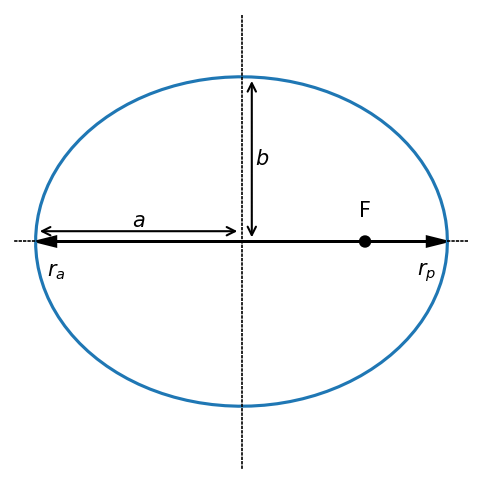

In [24]:
## code for plotting elliptical orbit

import matplotlib.patches as mpatches

angles = np.linspace(0, 2*np.pi, num=100)

eccentricity = 0.6
semi_major = 1.0
semi_minor = semi_major * np.sqrt(1.0 - eccentricity**2)

x_vals = semi_major * np.cos(angles)
y_vals = semi_minor * np.sin(angles)

fig, ax = plt.subplots()

ax.plot(x_vals, y_vals)

# plot focus location
p = mpatches.Circle(
    (eccentricity*semi_major, 0), radius=0.025, color='black'
    )
ax.add_patch(p)
focus_loc = eccentricity*semi_major
ax.text(focus_loc, 0.15, 'F', ha='center', va='center')

# focus to perigee
radius_perigee = semi_major * (1 - eccentricity)
ax.arrow(focus_loc, 0, radius_perigee, 0, head_width=0.05, head_length=0.1, 
         length_includes_head=True, fc='k', ec='k')
ax.text((focus_loc+radius_perigee)*0.9, -0.15, r'$r_p$', ha='center', va='center')

# focus to apogee
radius_apogee = semi_major * (1 + eccentricity)
ax.arrow(focus_loc, 0, -radius_apogee, 0, head_width=0.05, head_length=0.1, 
         length_includes_head=True, fc='k', ec='k')
ax.text(-(radius_apogee-focus_loc)*0.9, -0.15, r'$r_a$', ha='center', va='center')

plt.annotate('', xy=(-semi_major,0.05), xytext=(0,0.05), 
             arrowprops=dict(arrowstyle='<->'))
ax.text(-semi_major/2, 0.1, r'$a$', ha='center', va='center')

plt.annotate('', xy=(0.05,semi_minor), xytext=(0.05,0), 
             arrowprops=dict(arrowstyle='<->'))
ax.text(0.1, semi_minor/2, r'$b$', ha='center', va='center')

ax.axis('square')
ax.axis([-1.1, 1.1, -1.1, 1.1])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.set_xticks([])
ax.set_yticks([])

ax.spines['bottom'].set_linestyle("dotted")
ax.spines['left'].set_linestyle("dotted")

ax.set_axisbelow(True)

plt.show()

Some definitions:

* focus: $F$, is the location of the center of mass of the body being orbited (e.g., Earth)
* semi-major axis: $a$. This is also the average distance of the orbit.
* semi-minor axis: $b$
* point on the orbit nearest to the focus: periapse, with radial position $r_p$
* point on the orbit furthest from the focus: apoapse, with radial position $r_a$
* Apse line: the line connecting the focus and periapse.

For Earth-satellite systems, we call the periapse the **perigee** and the apoapse the **apogee**. These terms will vary depending on the body being orbited, for example in solar orbits we have the periapse and apoapse.
The true anomaly $\theta$ starts at the apse line; $\theta = 0$ at periapse/perigee and $\theta = \pi$ at apoapse/apogee.

Some useful relationships:

$$
\begin{align}
a &= \frac{r_p + r_a}{2} \\
e &= \frac{r_a - r_p}{r_a + r_p} \\
r_p &= a (1-e) = \frac{h^2/\mu}{1 + e} \\
r_a &= a (1+e) = \frac{h^2/\mu}{1 - e} \\
h^2 &= a \mu (1 - e^2)
\end{align}
$$

### Example problem workflow

**Problem:** given the altitude of a satellite, the velocity magnitude $v_0$, 
flight-path angle $\gamma$, and knowing the gravitational parameter for an 
Earth-satellite system ($\mu$ = 398,600 km$^3$/s$^2$, find the eccentricity of the orbit $e$
and the true anomaly $\theta$.

**Solution steps:**

1. Find $r$ = altitude + $R_e = 6378 km (the average radius of the Earth).
2. Calculate the velocity components, then use $v_{\theta}$ to get the angular momentum:
   
   $$
   \begin{align}
   v_r &= v_0 \sin \gamma = \frac{\mu}{h} e \sin \theta \\
   v_{\theta} &= v_0 \cos \gamma = \frac{h}{r} \rightarrow h
   \end{align}
   $$
   
3. Calculate $e \sin \theta$ and $e \cos \theta$:
   
   $$
   \begin{align}
   v_0 \sin \gamma &= \frac{\mu}{h} e \sin \theta \rightarrow e \sin \theta \\
   v_0 \cos \gamma = \frac{\mu}{h}(1 + e \cos \theta) \rightarrow e \cos \theta
   \end{align}
   $$

4. Calculate the true anomaly $\theta$:

   $$
   \tan \theta = \frac{e \sin \theta}{e \cos \theta} \rightarrow \theta
   $$
   
5. Calculate the eccentricity:

   $$
   r = \frac{h^2/\mu}{1 + e \cos \theta} \rightarrow e
   $$

```{warning}

Altitude is not the same thing as the radial position! Altitude is measured from the 
surface of the Earth, so you need to add the Earth's radius. 
(Also, this is not a constant value!)
```

## Kepler's Laws

We have already encountered Kepler's first law!

```{admonition} Kepler's First Law
Orbiting bodies travel in an ellipse.
```

For Kepler's second law, we need to look at how much time it takes orbits to sweep over a particular area;
